<span style="color:green">Exploratory Data Analysis for only the weather.</span>


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
weather_belgium = pd.read_csv('belgium_hourly_weather_2014_2024.csv')

print(weather_belgium.isnull().sum())

temperature_2m                0
apparent_temperature          0
dewpoint_2m                   0
relative_humidity_2m          0
precipitation                 0
rain                          0
snowfall                      0
cloudcover                    0
cloudcover_low                0
cloudcover_mid                0
cloudcover_high               0
windgusts_10m                 0
shortwave_radiation           0
direct_radiation              0
diffuse_radiation             0
direct_normal_irradiance      0
et0_fao_evapotranspiration    0
Region                        0
date                          0
hour                          0
dtype: int64


The dataset contains no null values

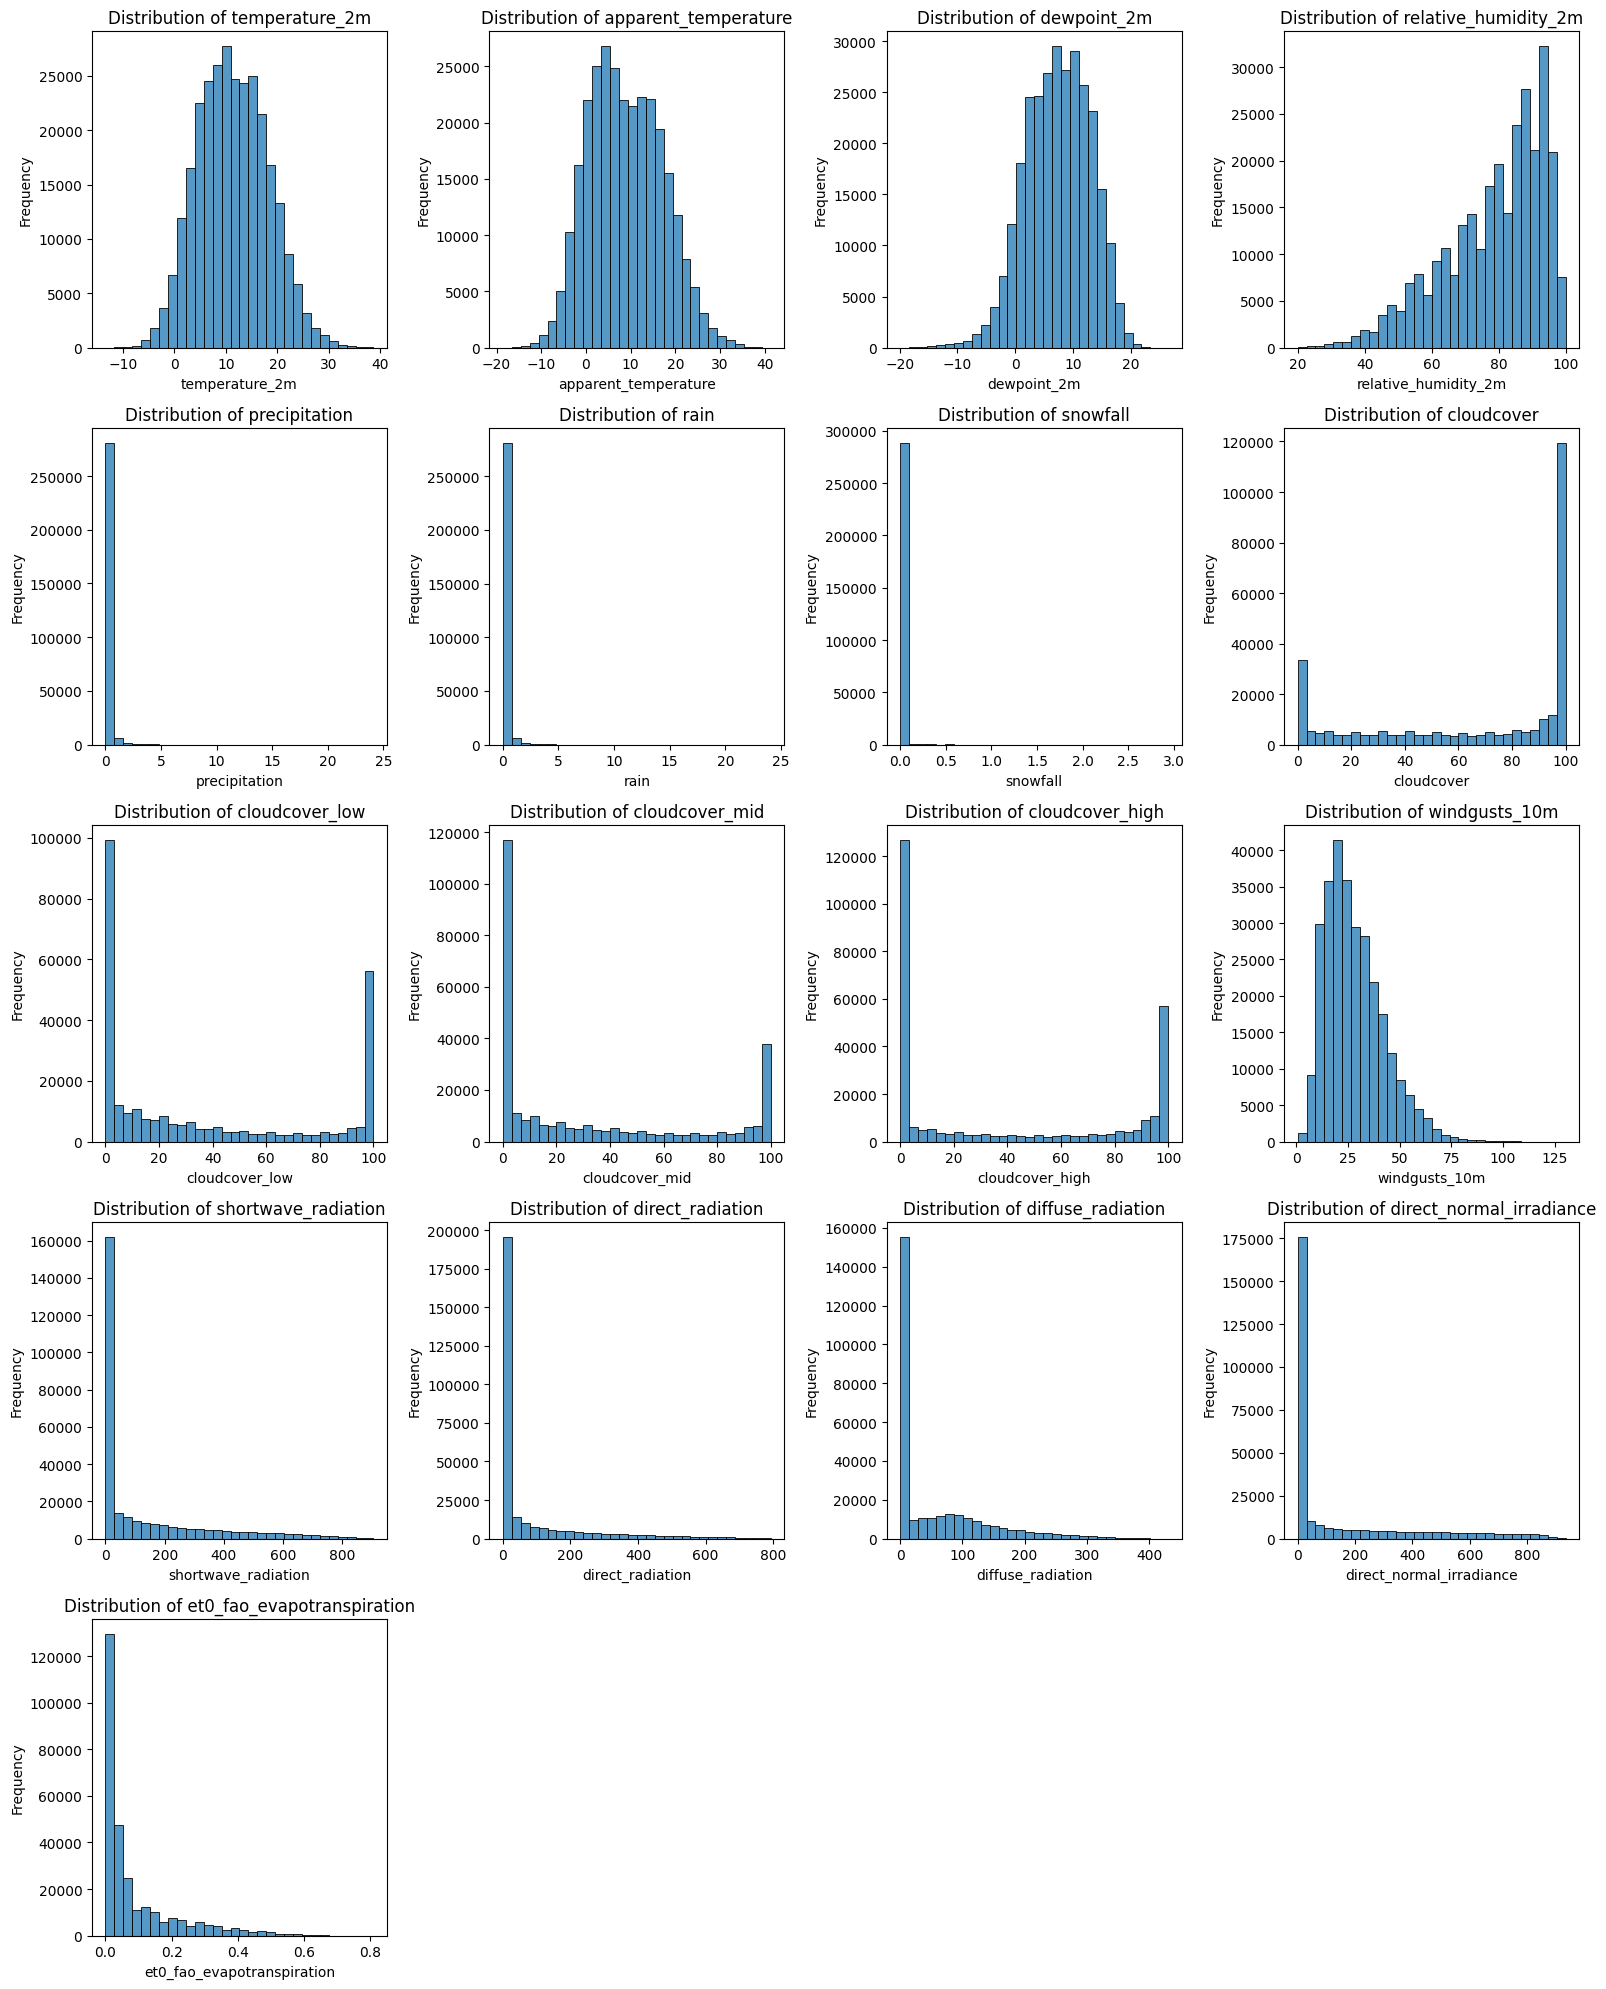

In [ ]:
fig, axs = plt.subplots(5, 4, figsize=(16, 20))
axs = axs.flatten() 

for i, column in enumerate(weather_belgium.columns):
    if i == 17:
        break
    sns.histplot(weather_belgium[column], ax=axs[i], bins = 30)
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
for i in range(17, 20):
    axs[i].set_visible(False)
    
plt.tight_layout()
plt.show()

The distributions for the different variables mainly look like normal distributions or exponential distributions

In [4]:
date2014 = weather_belgium[["date", "hour"]]
region = weather_belgium["Region"]

weather_belgium = weather_belgium.drop(["date", "hour", "Region"], axis=1)

def quartiles_method(Data):
    Data = Data.apply(pd.to_numeric, errors='coerce')

    for column in Data.columns:
        tempo = Data[column]
        q1 = tempo.quantile(0.25)
        q3 = tempo.quantile(0.75)
        lower = q1 - 1.5 * (q3 - q1)
        upper = q3 + 1.5 * (q3 - q1)
        Data = Data[Data[column] >= lower] 
        Data = Data[Data[column] <= upper]
    return Data

# Doing a Z-score method to remove the outliers
def zscore_method(Data):
    Data = Data.apply(pd.to_numeric, errors='coerce')
    z = np.abs((Data - Data.mean()) / Data.std())
    Data = Data[(z < 3).all(axis=1)]
    return Data

weather_belgium_quartiles = quartiles_method(weather_belgium)

weather_belgium_zscore = zscore_method(weather_belgium)

print(f"Initial shape :",weather_belgium.shape)

print(f"Shape with quartiles :",weather_belgium_quartiles.shape)

print(f"Shape with Z-scores :",weather_belgium_zscore.shape)



Initial shape : (289296, 17)
Shape with quartiles : (104922, 17)
Shape with Z-scores : (264231, 17)


Comparing those 2 methods for outlier removals, the z-score will be chosen as the quartile method removes more than half of the dataset which is way too much

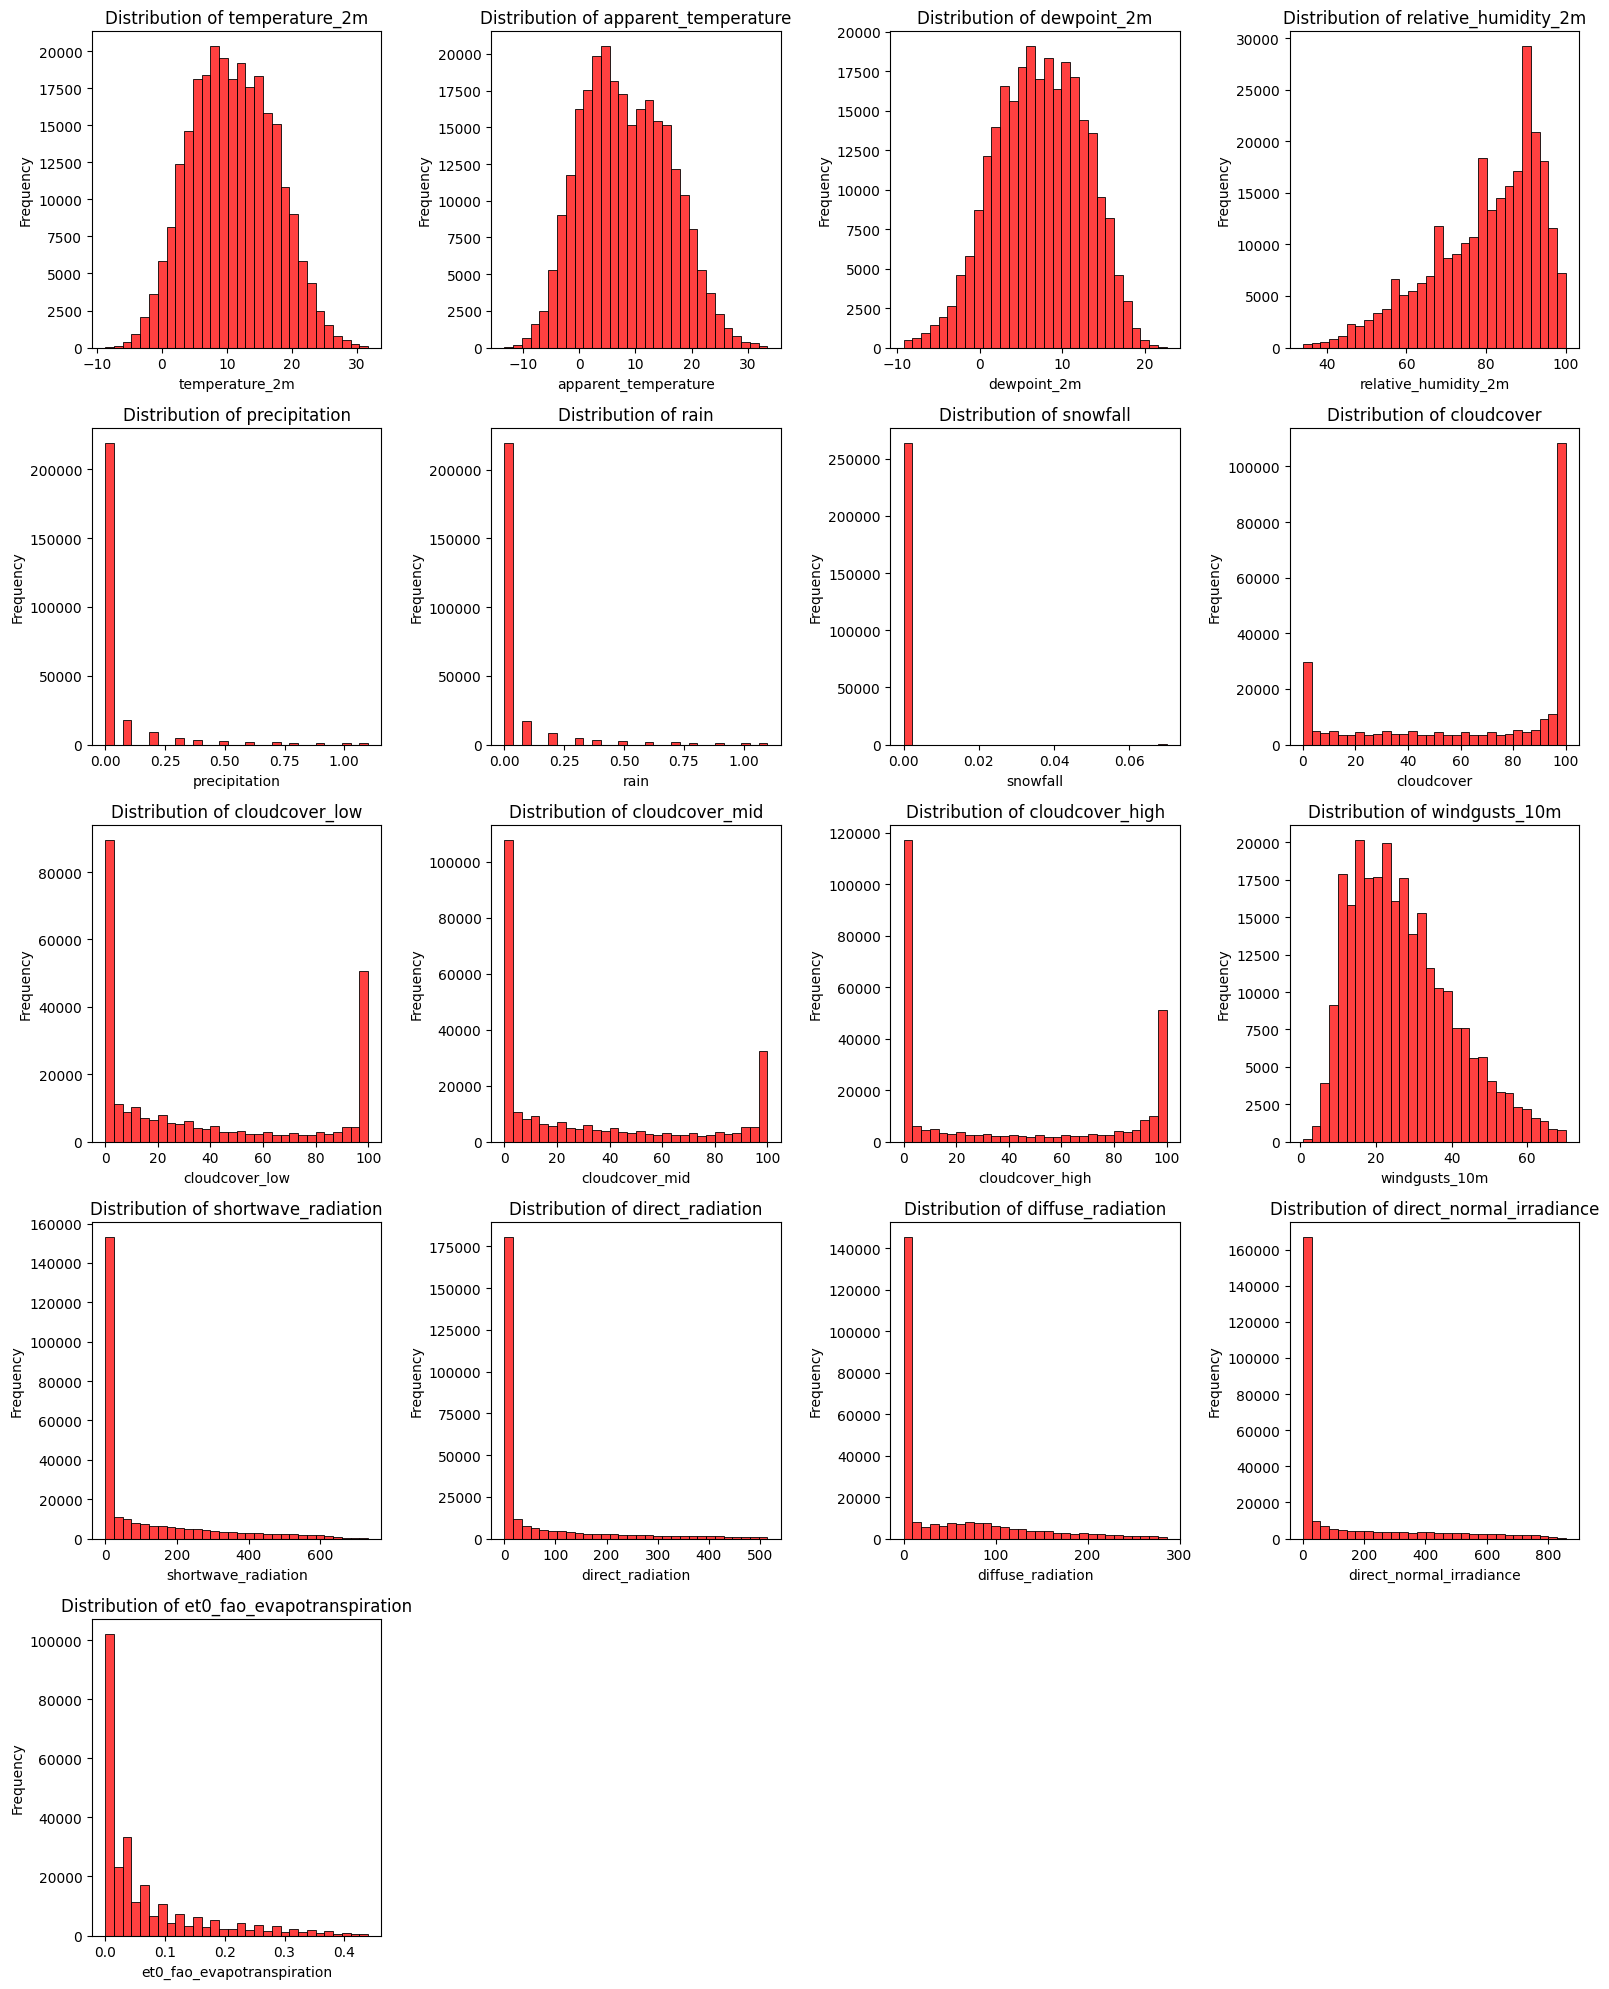

In [5]:
fig, axs = plt.subplots(5, 4, figsize=(16, 20))
axs = axs.flatten() 

for i, column in enumerate(weather_belgium_zscore.columns):
    sns.histplot(weather_belgium_zscore[column], ax=axs[i], bins = 30, color = 'r')
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
for i in range(17, 20):
    axs[i].set_visible(False)
    
plt.tight_layout()
plt.show()

In [6]:
weather_belgium_zscore.describe()

,temperature_2m,apparent_temperature,dewpoint_2m,relative_humidity_2m,precipitation,rain,snowfall,cloudcover,cloudcover_low,cloudcover_mid,cloudcover_high,windgusts_10m,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,et0_fao_evapotranspiration
count,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.000000,264231.00000,264231.000000,264231.000000
mean,10.898470,8.340680,7.246476,79.710450,0.053124,0.052868,0.000191,66.739012,36.947099,31.382809,38.785627,27.310408,102.137982,55.120701,47.01728,123.961424,0.068442
std,6.385212,7.725458,5.372490,13.560466,0.158965,0.158773,0.003652,37.710997,39.730800,37.291675,42.671480,13.383138,162.311948,109.824541,68.43853,210.305136,0.093305
min,-8.700000,-13.300000,-9.200000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6.100000,2.400000,3.300000,71.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,16.900000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,10.700000,7.700000,7.300000,83.000000,0.000000,0.000000,0.000000,87.000000,19.000000,12.000000,13.000000,25.200000,1.000000,0.000000,1.00000,0.000000,0.030000
75%,15.600000,14.200000,11.300000,91.000000,0.000000,0.000000,0.000000,100.000000,81.000000,60.000000,91.000000,35.600000,157.000000,47.000000,81.00000,174.600000,0.090000
max,31.700000,33.500000,22.600000,100.000000,1.100000,1.100000,0.070000,100.000000,100.000000,100.000000,100.000000,70.200000,734.000000,515.000000,286.00000,858.400000,0.440000


The variables have different scales, there are percentages for the relative_humidity and cloud_covers, other have very low values like precipitation, but overall the differences in value are not too high.

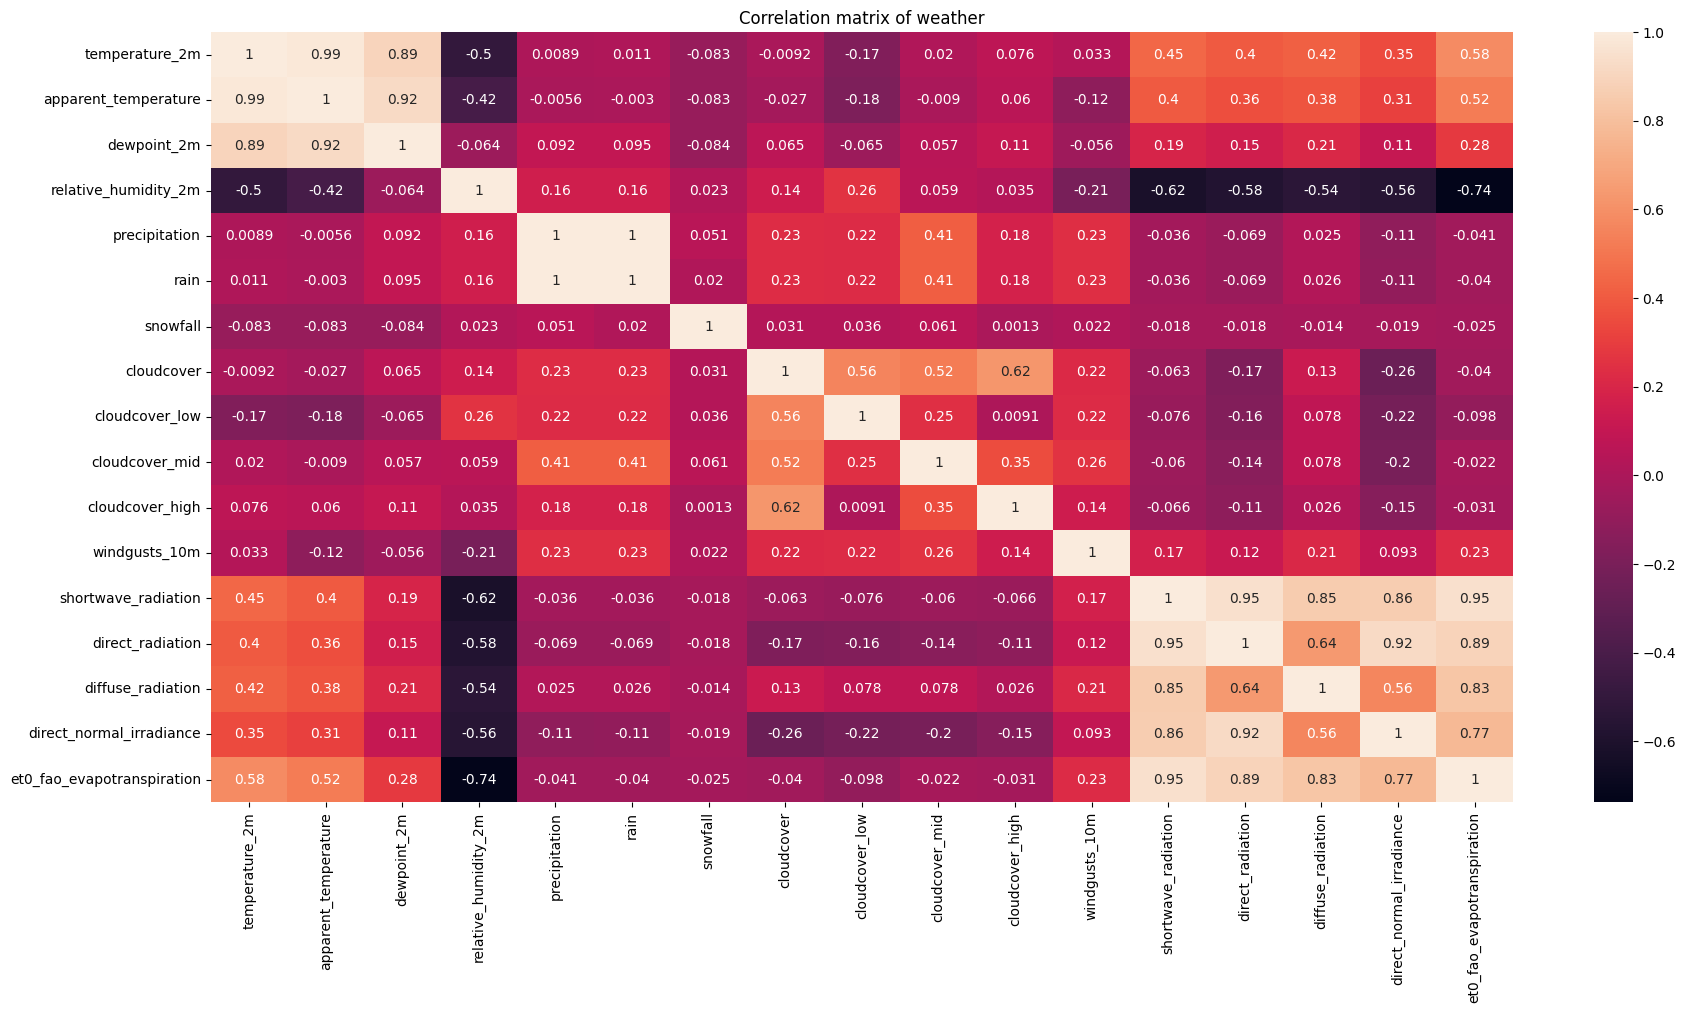

In [7]:
correlation_matrix = weather_belgium_zscore.corr()

fig  = plt.figure(figsize=(21, 10))
sns.heatmap(correlation_matrix, annot=True,)
plt.title('Correlation matrix of weather')
plt.show()

Some unexpected results are that relative_humidity is more correlated to temperature than precipitation also that precipitation is not that highly correlated to precipitations.

In [14]:
date2014_zscore = date2014.loc[weather_belgium_zscore.index]
region_zscore = region.loc[weather_belgium_zscore.index]


def test_region(column):
    data_region = []
    sampled_rows = weather_belgium.sample(n=10000, random_state=0)
    for i in range(10000):
        temp = sampled_rows.iloc[i][column] 
        reg = region.loc[sampled_rows.index[i]]  
        data_region.append((reg, temp))
    df_sampled = pd.DataFrame(data_region, columns=["Region", column])
    selected_regions = df_sampled["Region"].unique()[:3] 
    fig, axs = plt.subplots(3, 1, figsize=(18, 6), sharey=True)
    axs = axs.flatten()
    for i, reg in enumerate(selected_regions):
        sns.histplot(df_sampled[df_sampled["Region"] == reg][column], bins=30, kde=True, ax=axs[i])
        axs[i].set_title(f"{column} Distribution in {reg}")
        axs[i].set_xlabel(column)
        axs[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()


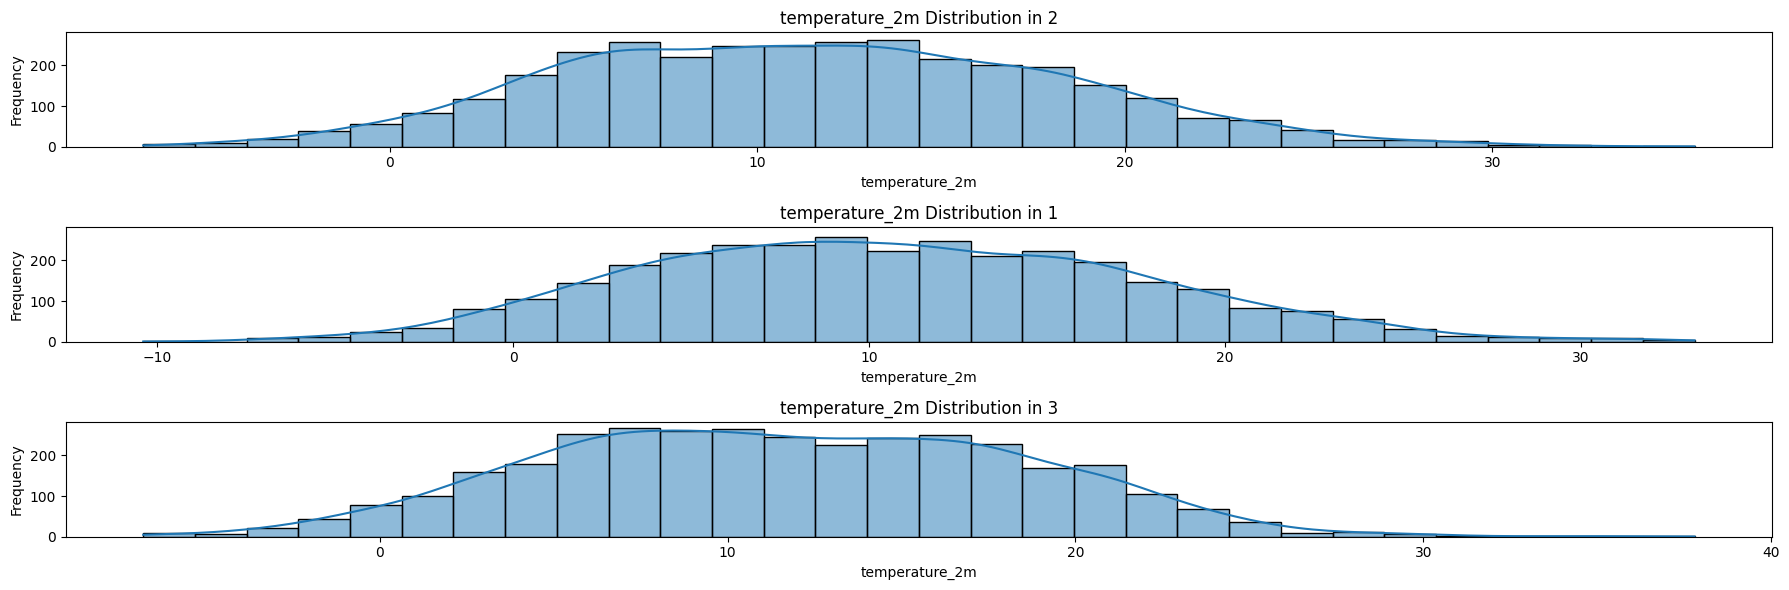

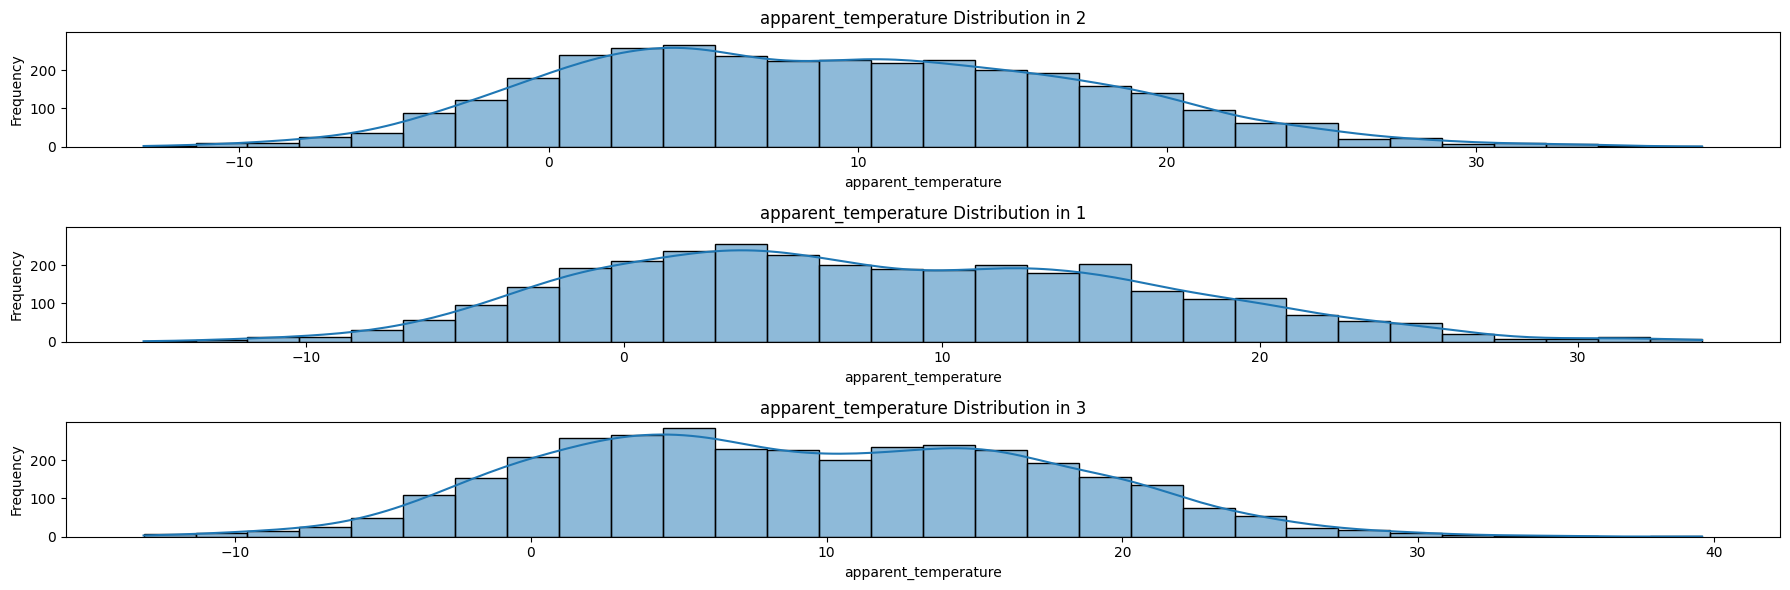

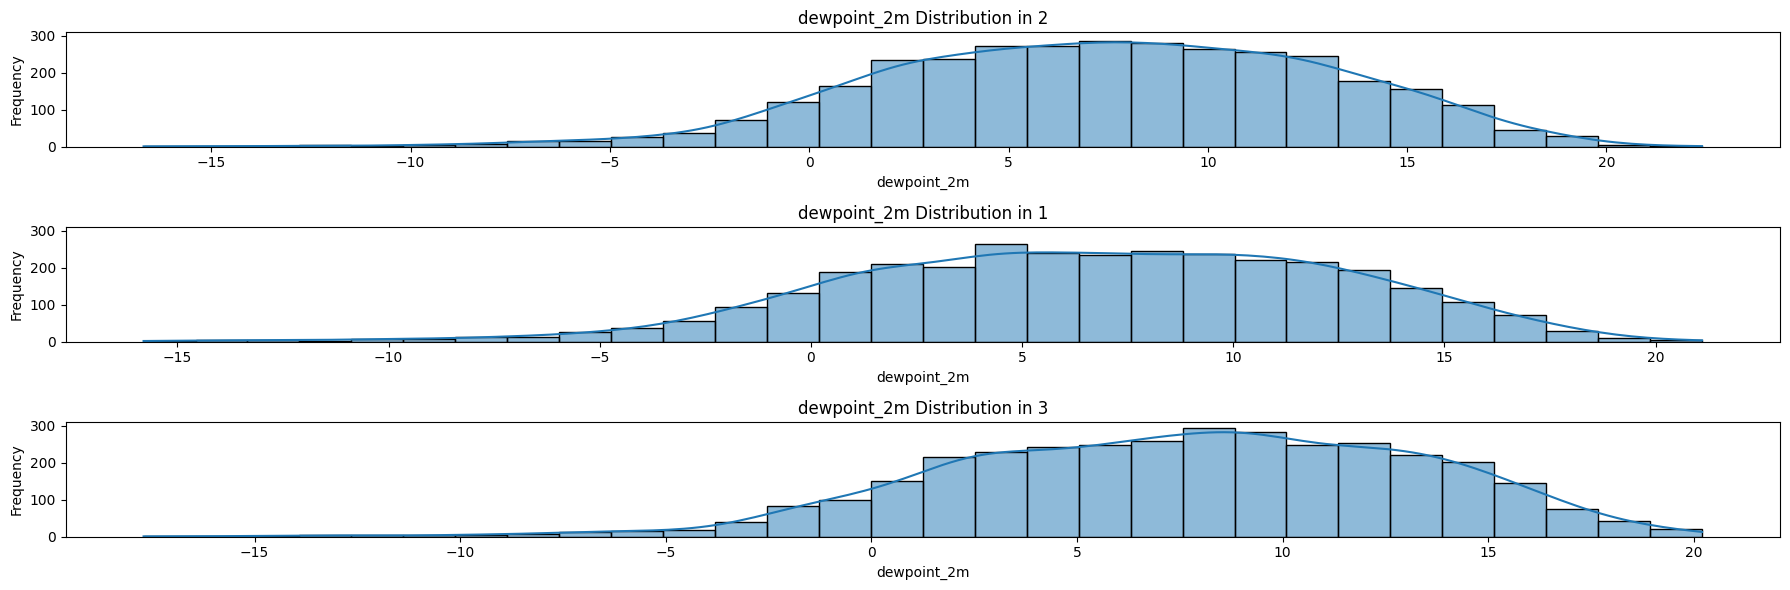

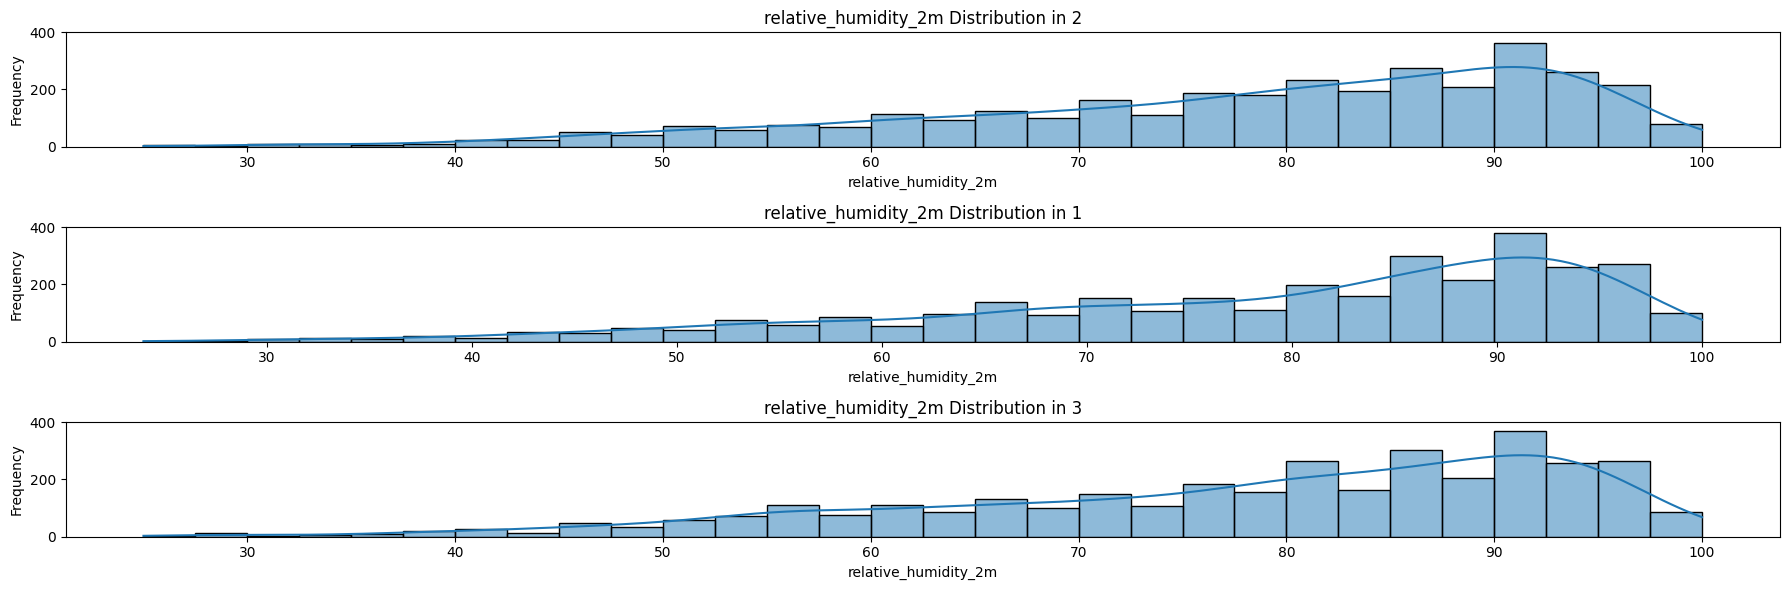

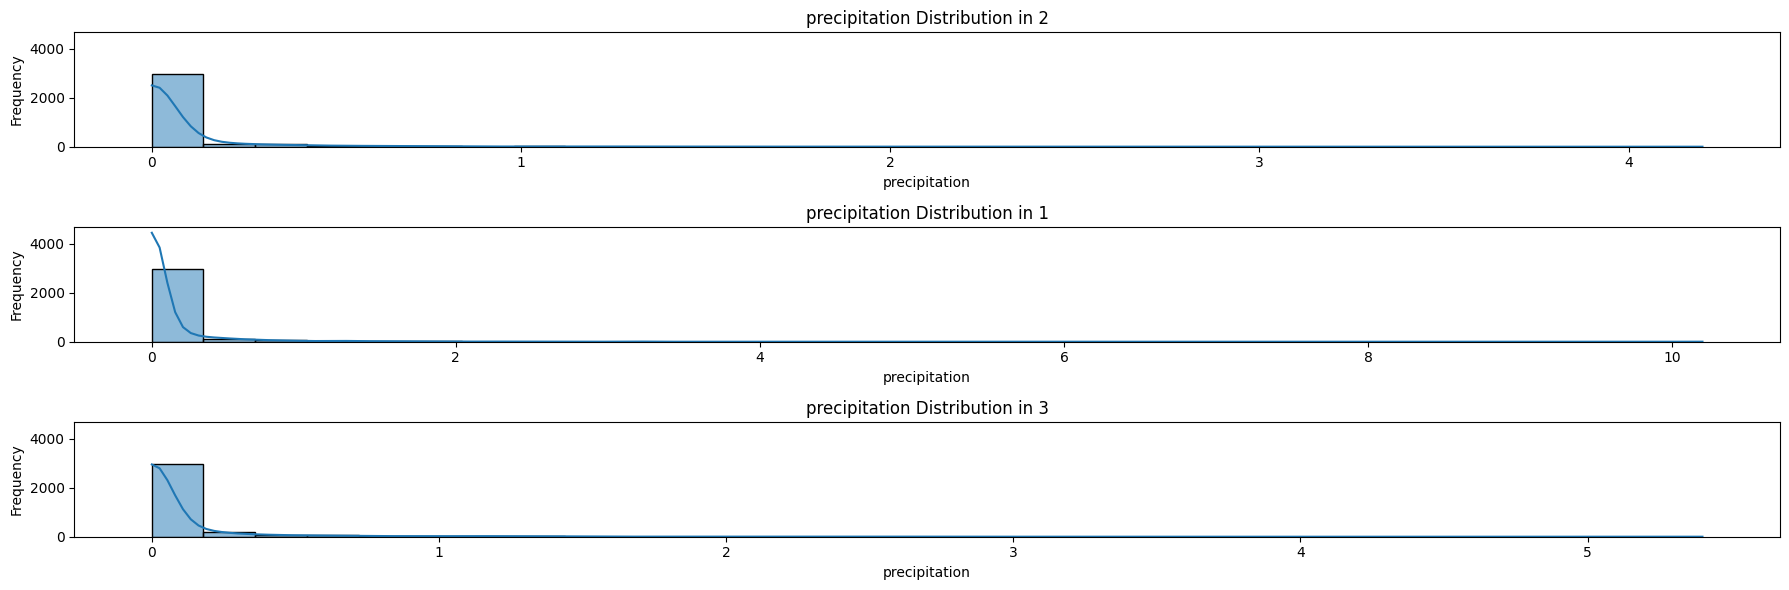

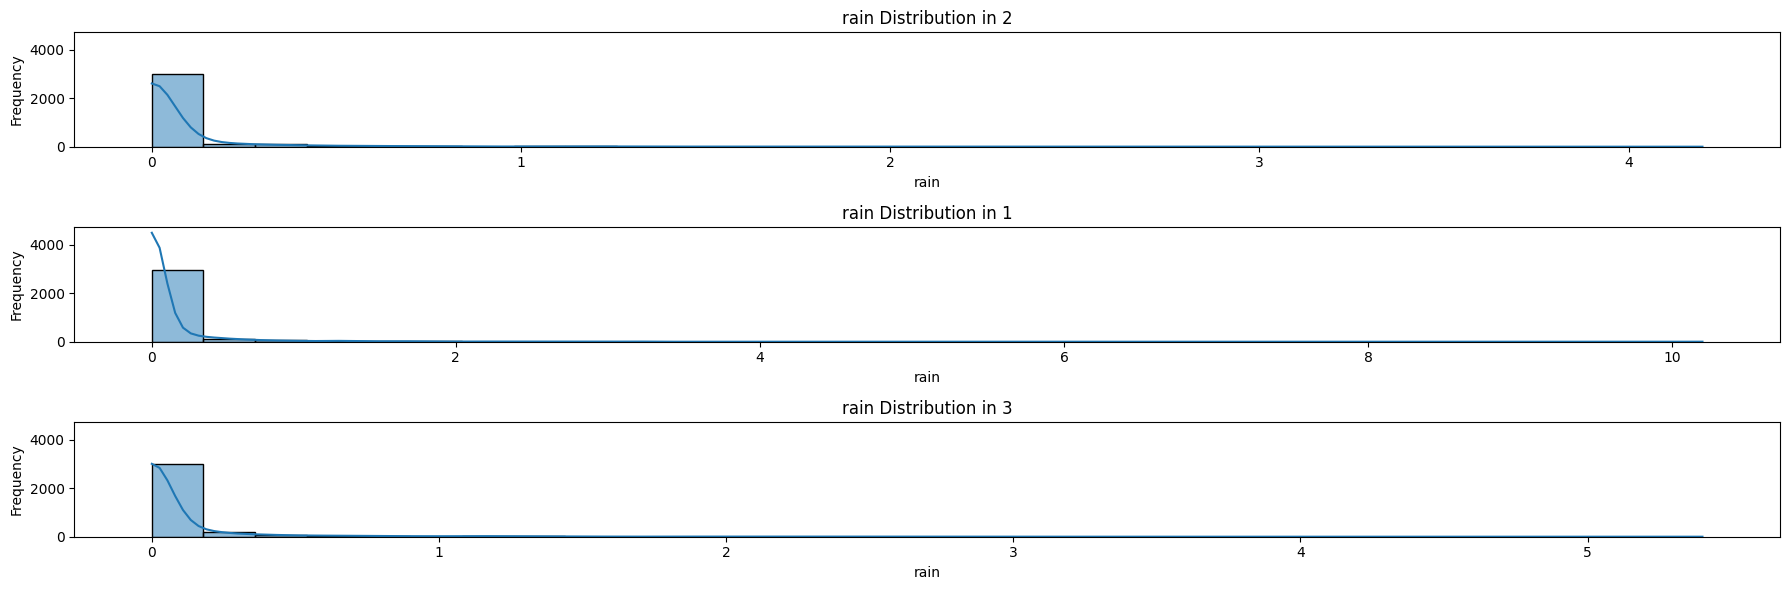

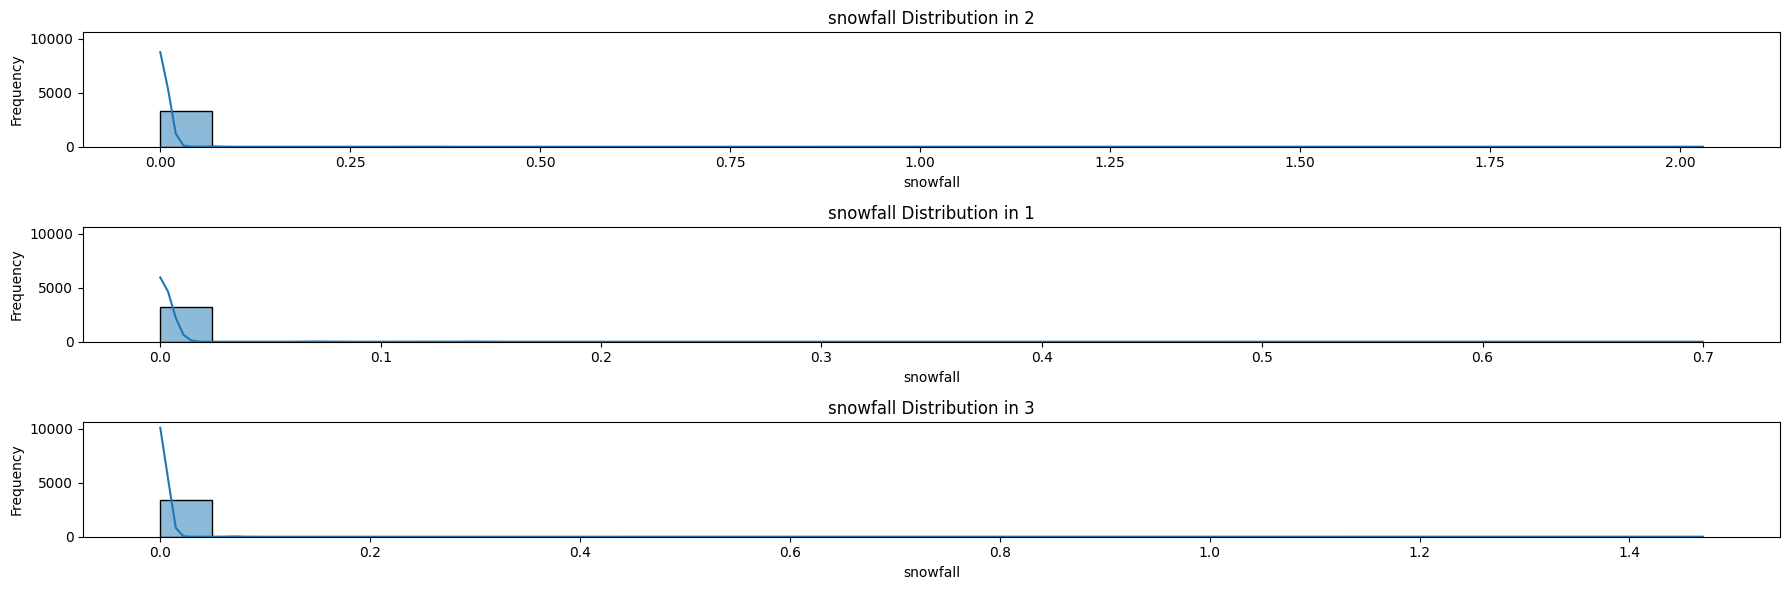

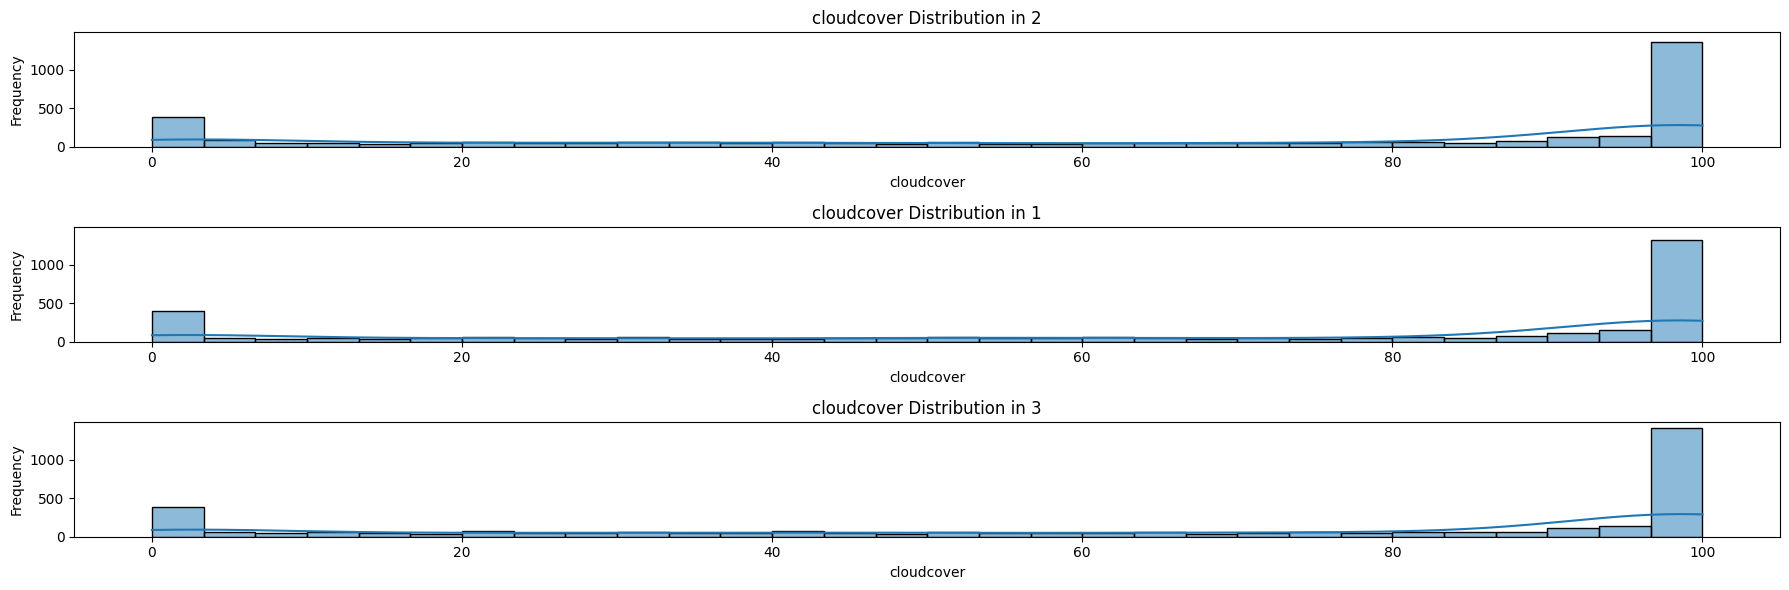

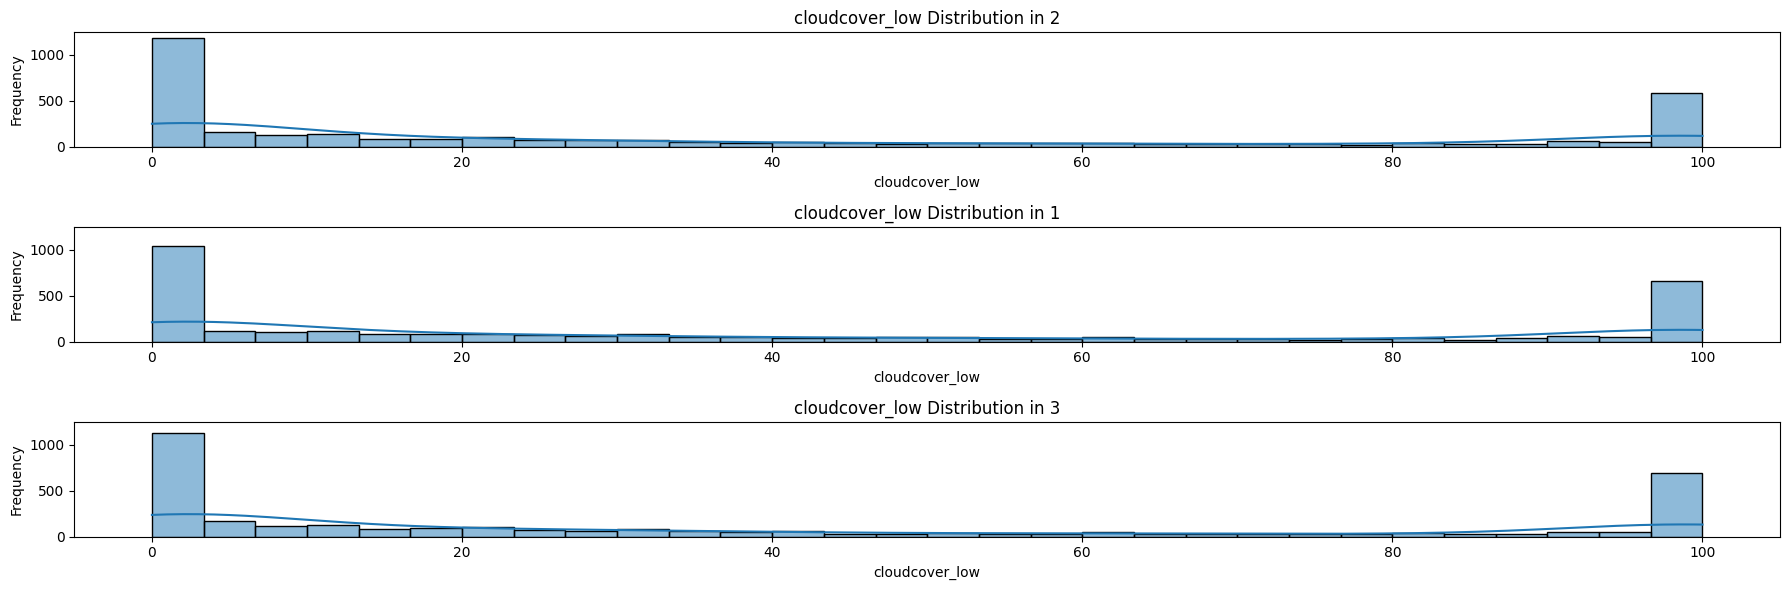

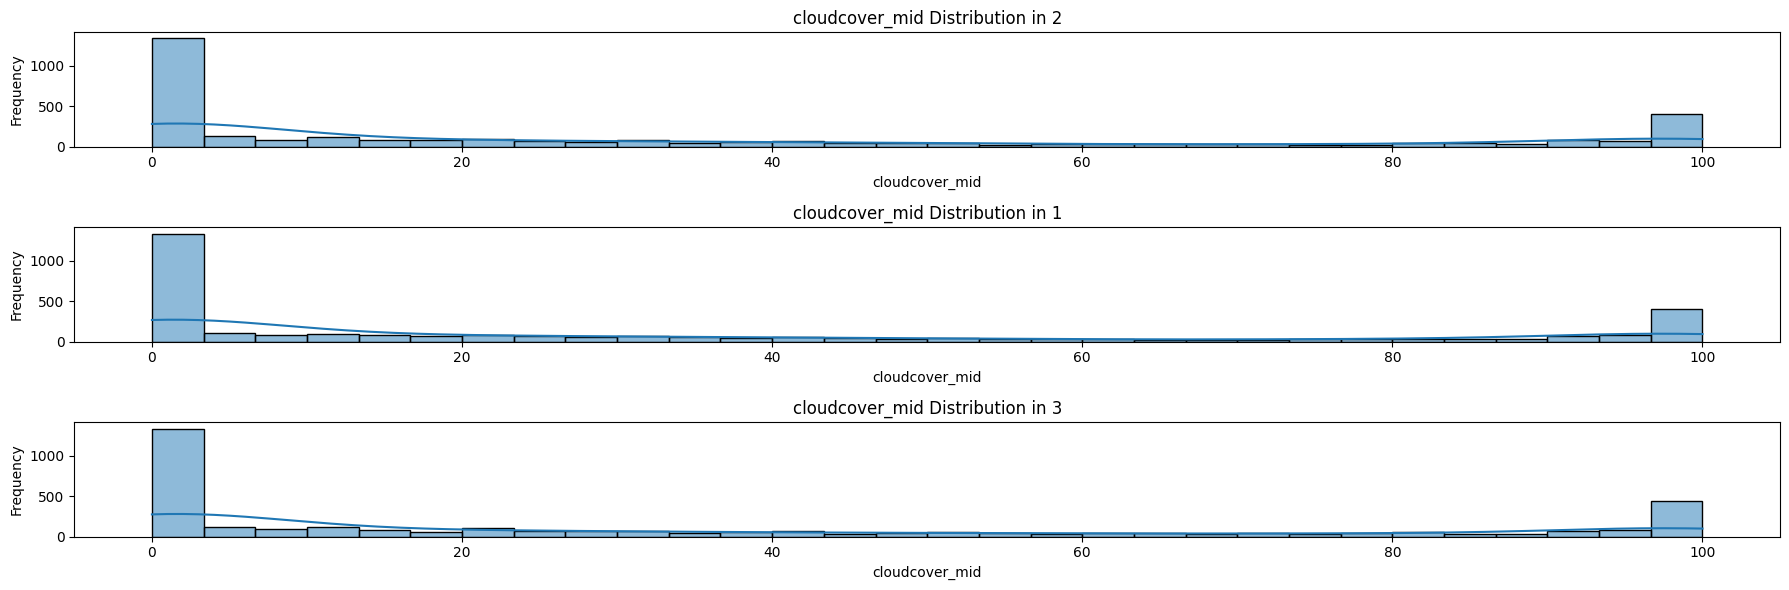

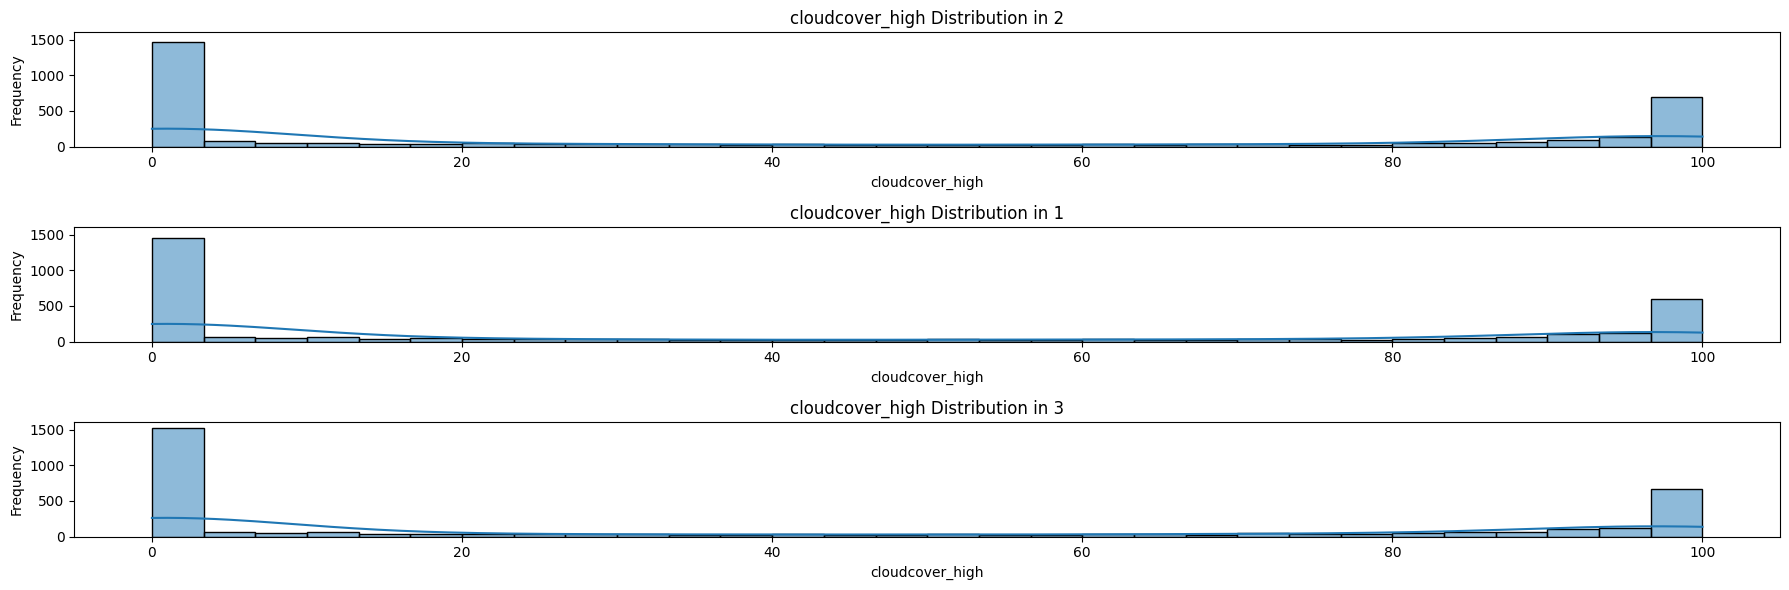

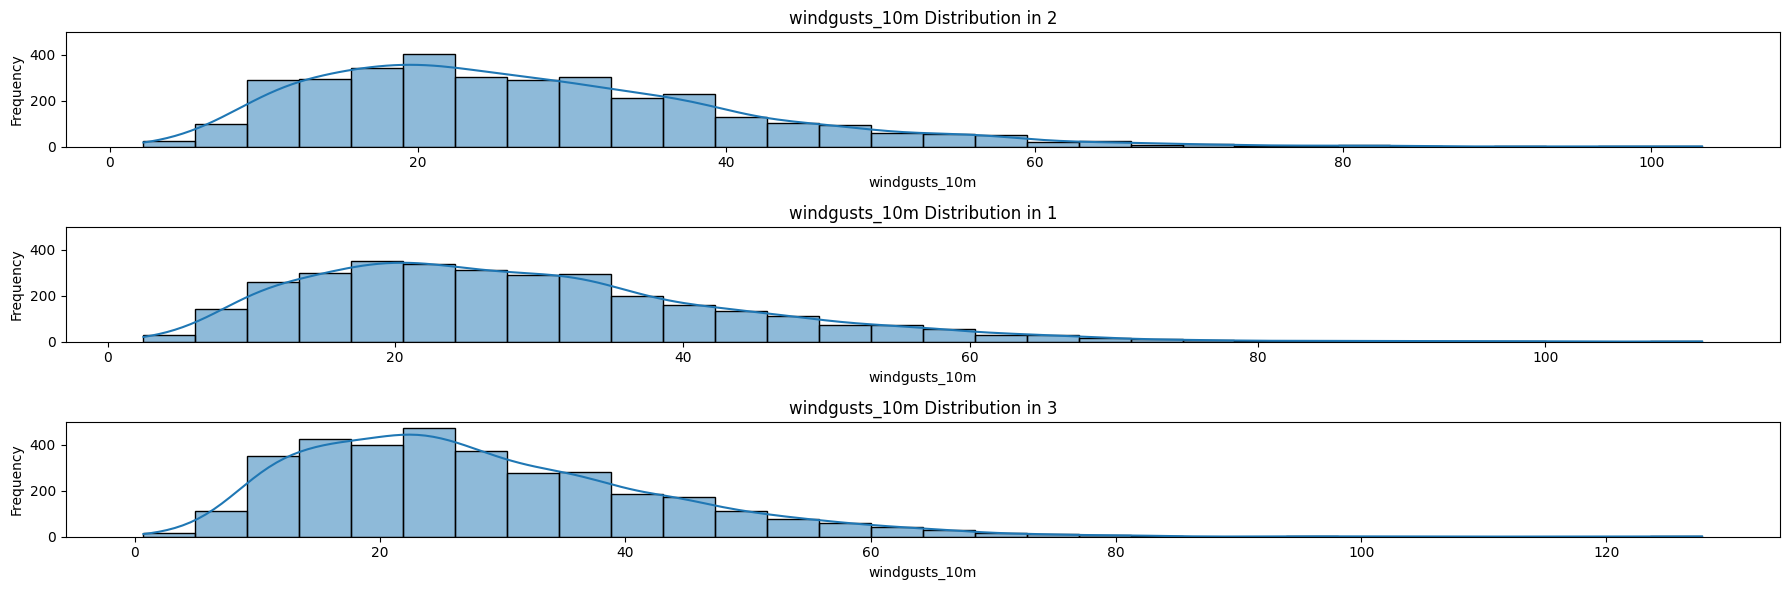

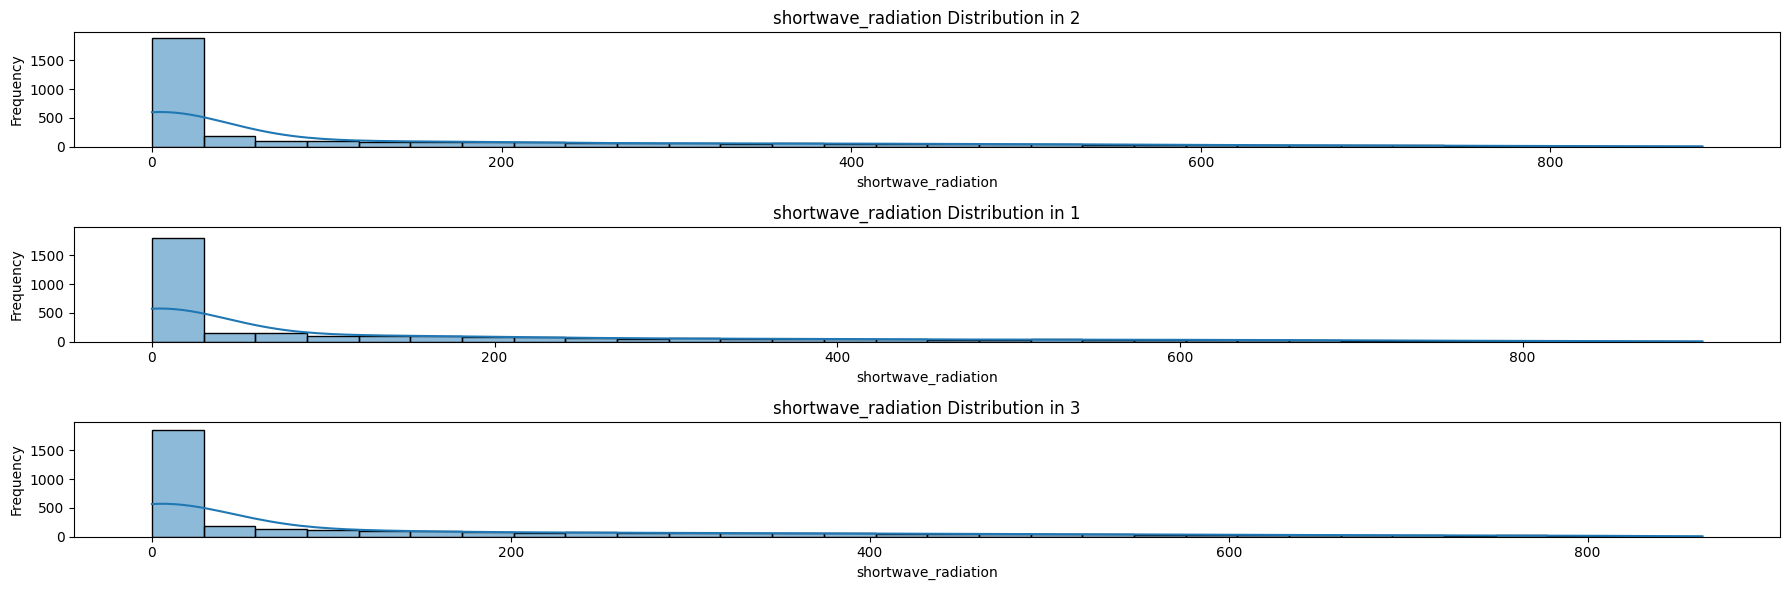

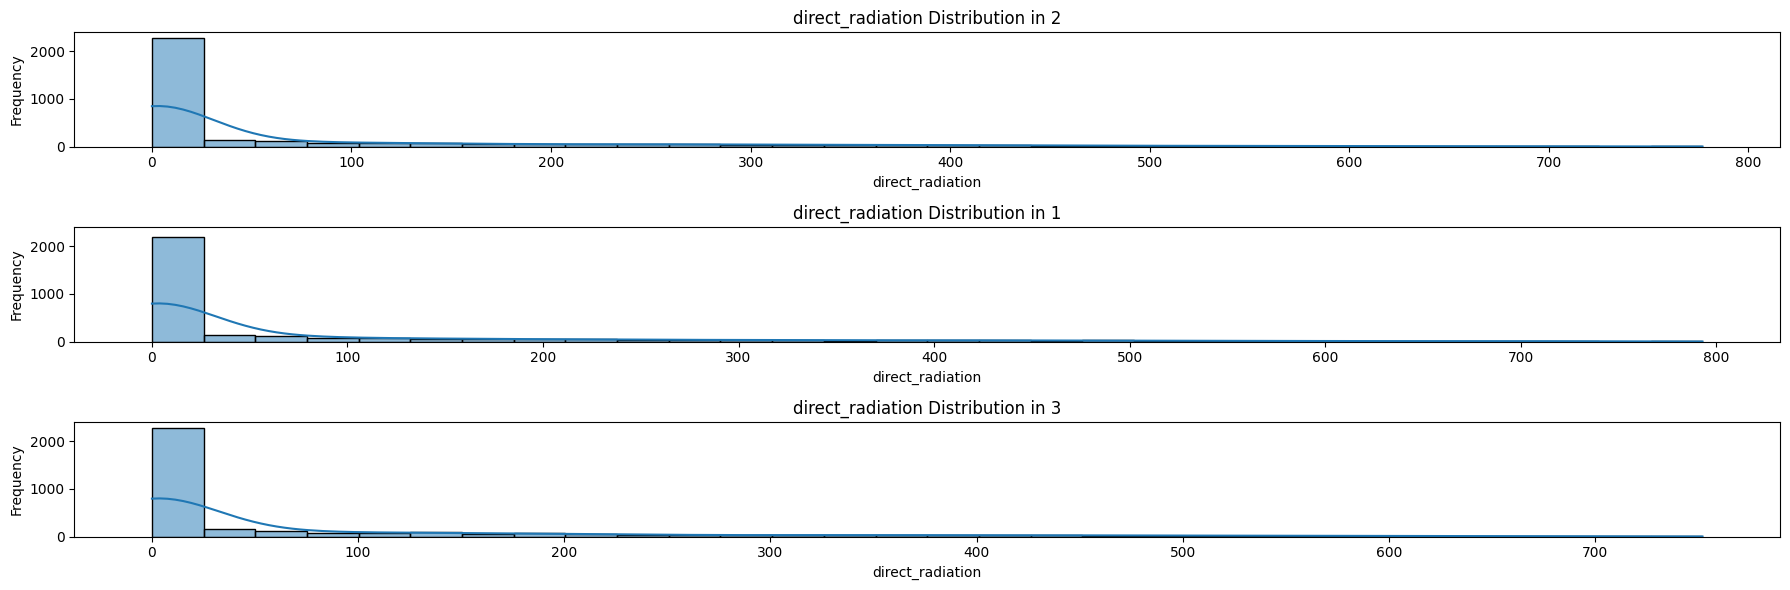

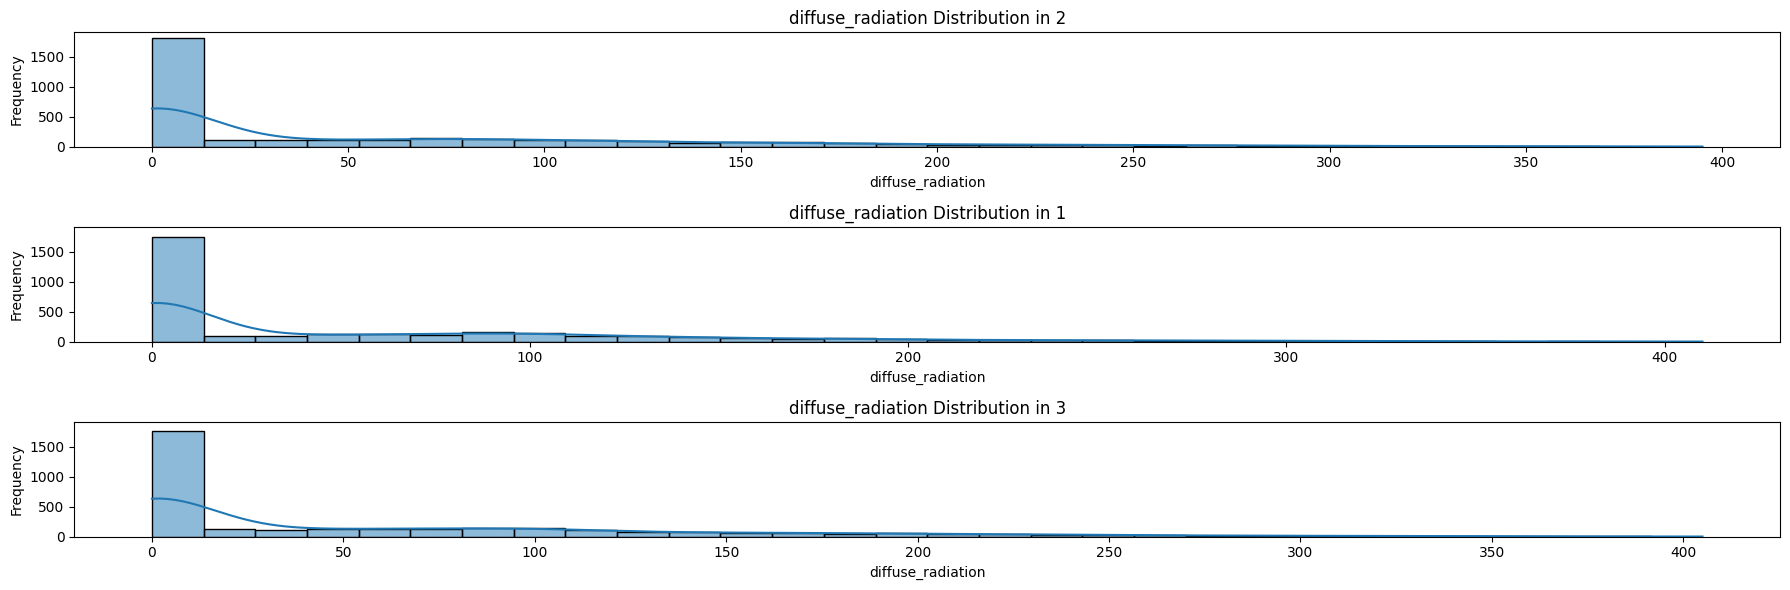

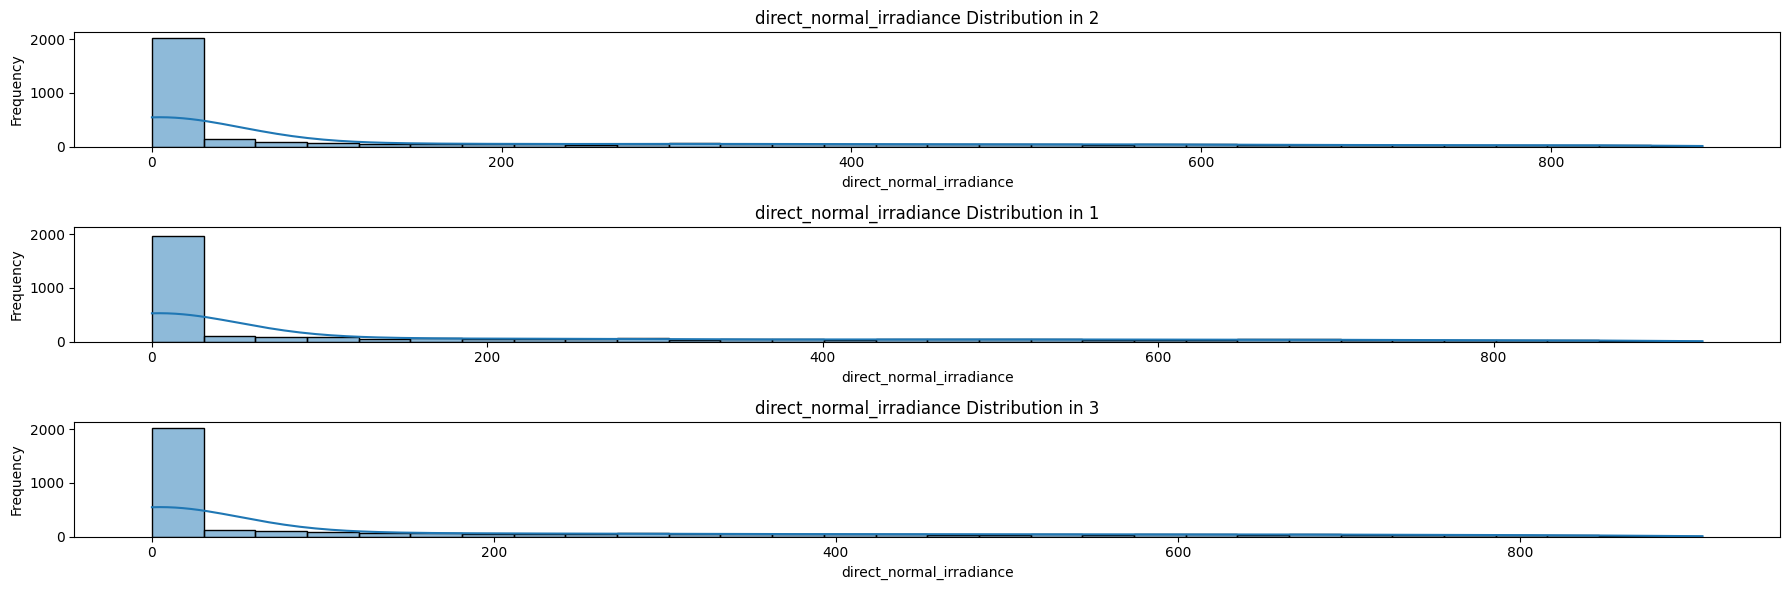

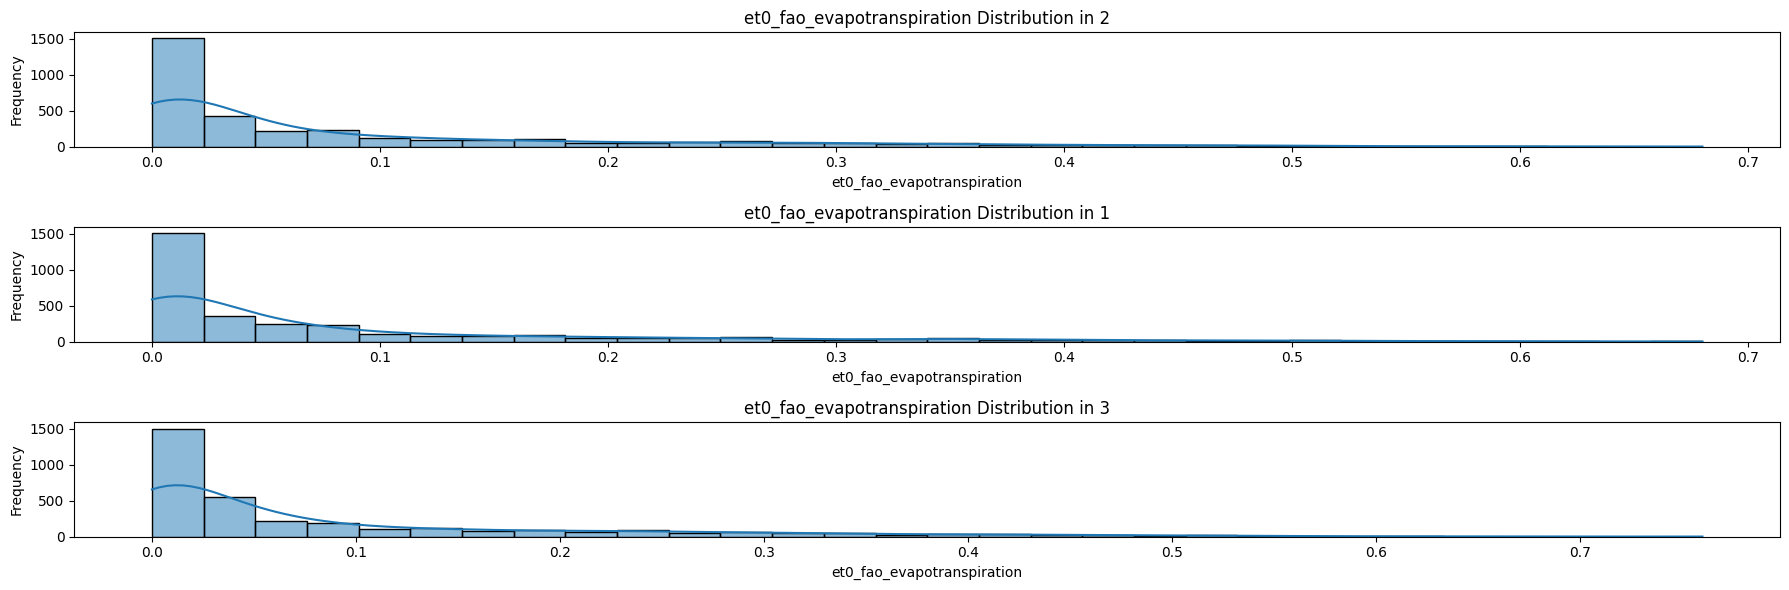

In [13]:
for column in weather_belgium_zscore.columns:
    test_region(column)

The values are relatively the same in all 3 regions, the only difference are that the max and min are slightly different but the percentage of values within those is extremely small.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def compare_years(column, years=[2014, 2015, 2016,2017,2018,2019,2020,2021,2022,2023,2024]):
    data_year = []

    # Ensure the date column is in datetime format
    weather_belgium["date"] = pd.to_datetime(weather_belgium["date"])

    # Iterate through the selected years
    for year in years:
        # Filter data for the current year
        yearly_data = weather_belgium[weather_belgium["date"].dt.year == year]

        # Sample 1000 rows (or all available if less than 1000)
        sampled_rows = yearly_data.sample(n=min(1000, len(yearly_data)), random_state=0)

        # Store year and column value
        for i in range(len(sampled_rows)):
            value = sampled_rows.iloc[i][column]  # Extract temperature (or any numerical column)
            data_year.append((year, value))

    # Convert to DataFrame
    df_sampled = pd.DataFrame(data_year, columns=["Year", column])

    # Create histograms comparing distributions across years
    fig, axs = plt.subplots(1, len(years), figsize=(6 * len(years), 6), sharey=True)

    for i, year in enumerate(years):
        sns.histplot(df_sampled[df_sampled["Year"] == year][column], bins=30, kde=True, ax=axs[i])
        axs[i].set_title(f"{column} Distribution in {year}")
        axs[i].set_xlabel(column)
        axs[i].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

compare_years("temperature_2m")


KeyError: 'date'